In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\32197\Desktop\结构化数据_清洗2.csv", encoding = 'gbk', low_memory = False)

In [2]:
df['日期_Date'] = pd.to_datetime(df['日期_Date'])
df = df.sort_values(by = ['A股股票代码_A_StkCd','日期_Date']).copy()

In [3]:
exclude_cols = ['日期_Date', 'A股股票代码_A_StkCd', '月收益率_Monret']
feature_cols = [col for col in df.columns if col not in exclude_cols]

In [4]:
def build_sliding_window(df, window_size=6):
    X_list, y_list, sd_list = [], [], []

    # 按股票分别处理
    for stock_id, group in df.groupby('A股股票代码_A_StkCd'):
        group = group.reset_index(drop=True)
        for i in range(len(group) - window_size):
            X_window = group.loc[i:i+window_size-1, feature_cols].values.flatten()
            y_target = group.loc[i + window_size, '月收益率_Monret']
            stdcd_date = group.loc[i + window_size, ['A股股票代码_A_StkCd','日期_Date']]
            X_list.append(X_window)
            y_list.append(y_target)
            sd_list.append(stdcd_date)
    
    new_columns = []
    for lag in range(window_size, 0, -1):  # 从 t-6 到 t-1
        for col in feature_cols:
            new_columns.append(f"{col}_t-{lag}")
    
    
    X_df = pd.DataFrame(X_list, columns=new_columns)
    y_df = pd.DataFrame(y_list, columns=['月收益率_Monret'])
    meta_df = pd.DataFrame(sd_list)

    return X_df, y_df, meta_df

X_df, y_df, meta_df = build_sliding_window(df, window_size=6)

In [5]:
X_df

,收盘价(元)_ClPr_t-6,成交量(股)_Trdvol_t-6,每股收益(摊薄)(元/股)_EPS_t-6,净资产收益率(摊薄)(%)_ROE_t-6,每股营业利润(元/股)_OpPrfPS_t-6,每股营业收入(元/股)_IncomePS_t-6,成交金额(元)_Trdsum_t-6,总股数月换手率(%)_MonFulTurnR_t-6,流通股月换手率(%)_MonTrdTurnR_t-6,总股数平均日换手率()_AvgDFulTurnR_t-6,...,资产总计(元)_TotAss_t-1,流动负债合计(元)_TotCurLia_t-1,非流动负债合计(元)_TotNCurLia_t-1,负债合计(元)_TotLiab_t-1,实收资本（或股本）(元)_PaidCap_t-1,所有者权益（或股东权益）合计(元)_TotShareEquit_t-1,负债率_t-1,财务杠杆_t-1,经营活动产生的现金流量净额()_NetOpCashFl_t-1,滞后天数_t-1
0,8.42,2167758230,0.26,7.0714,0.43,1.73,1.837443e+10,22.3936,22.3936,1.0664,...,1.879350e+11,1.086910e+11,2.990752e+10,1.385990e+11,1.099521e+10,4.933673e+10,0.737480,3.809237,-1.207364e+09,98
1,8.40,1417329643,0.26,7.0714,0.43,1.73,1.173958e+10,14.6414,14.6414,0.7706,...,1.879350e+11,1.086910e+11,2.990752e+10,1.385990e+11,1.099521e+10,4.933673e+10,0.737480,3.809237,-1.207364e+09,126
2,9.70,2831296321,0.04,1.1415,0.09,0.58,2.630647e+10,29.2482,29.2482,1.8280,...,2.156380e+11,1.296510e+11,3.140056e+10,1.610510e+11,1.099521e+10,5.458620e+10,0.746861,3.950404,2.237255e+09,22
3,8.13,2731315972,0.04,1.1415,0.09,0.58,2.446543e+10,28.2153,28.2153,1.2825,...,2.353590e+11,1.518070e+11,2.742215e+10,1.792300e+11,1.099521e+10,5.612924e+10,0.761516,4.193159,-1.975209e+09,9
4,8.22,2221366246,0.04,1.1415,0.09,0.58,1.913525e+10,22.9474,22.9474,0.9977,...,2.353590e+11,1.518070e+11,2.742215e+10,1.792300e+11,1.099521e+10,5.612924e+10,0.761516,4.193159,-1.975209e+09,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438518,9.99,15233711,0.53,6.8866,0.60,5.40,1.628982e+08,18.4965,51.9437,0.8808,...,7.340608e+08,8.880997e+07,2.767736e+07,1.164873e+08,8.236000e+07,6.175735e+08,0.158689,1.188621,6.054113e+07,1
438519,9.34,12337887,0.06,0.7366,0.06,1.29,1.164964e+08,14.9804,42.0696,0.7490,...,7.340608e+08,8.880997e+07,2.767736e+07,1.164873e+08,8.236000e+07,6.175735e+08,0.158689,1.188621,6.054113e+07,32
438520,8.36,6824911,0.06,0.7366,0.06,1.29,6.040690e+07,8.2867,22.4158,0.4143,...,7.274720e+08,9.621585e+07,2.691241e+07,1.231283e+08,8.236000e+07,6.043438e+08,0.169255,1.203739,6.530540e+07,1
438521,8.02,6345098,0.06,0.7366,0.06,1.29,5.017894e+07,7.7041,20.0572,0.4055,...,7.274720e+08,9.621585e+07,2.691241e+07,1.231283e+08,8.236000e+07,6.043438e+08,0.169255,1.203739,6.530540e+07,30


In [6]:
y_df

,月收益率_Monret
0,-0.0049
1,0.0650
2,-0.0242
3,-0.0637
4,0.0778
...,...
438518,0.3077
438519,0.3276
438520,0.3377
438521,-0.3414


In [7]:
meta_df

,A股股票代码_A_StkCd,日期_Date
6,2,2011-02-28
7,2,2011-03-30
8,2,2011-04-29
9,2,2011-05-31
10,2,2011-06-30
...,...,...
9,873833,2024-09-30
10,873833,2024-10-31
11,873833,2024-11-29
12,873833,2024-12-31


In [8]:
full_data = pd.concat([
    meta_df.reset_index(drop=True),
    y_df.reset_index(drop=True),
    X_df.reset_index(drop=True)
], axis=1)

In [9]:
full_data

,A股股票代码_A_StkCd,日期_Date,月收益率_Monret,收盘价(元)_ClPr_t-6,成交量(股)_Trdvol_t-6,每股收益(摊薄)(元/股)_EPS_t-6,净资产收益率(摊薄)(%)_ROE_t-6,每股营业利润(元/股)_OpPrfPS_t-6,每股营业收入(元/股)_IncomePS_t-6,成交金额(元)_Trdsum_t-6,...,资产总计(元)_TotAss_t-1,流动负债合计(元)_TotCurLia_t-1,非流动负债合计(元)_TotNCurLia_t-1,负债合计(元)_TotLiab_t-1,实收资本（或股本）(元)_PaidCap_t-1,所有者权益（或股东权益）合计(元)_TotShareEquit_t-1,负债率_t-1,财务杠杆_t-1,经营活动产生的现金流量净额()_NetOpCashFl_t-1,滞后天数_t-1
0,2,2011-02-28,-0.0049,8.42,2167758230,0.26,7.0714,0.43,1.73,1.837443e+10,...,1.879350e+11,1.086910e+11,2.990752e+10,1.385990e+11,1.099521e+10,4.933673e+10,0.737480,3.809237,-1.207364e+09,98
1,2,2011-03-30,0.0650,8.40,1417329643,0.26,7.0714,0.43,1.73,1.173958e+10,...,1.879350e+11,1.086910e+11,2.990752e+10,1.385990e+11,1.099521e+10,4.933673e+10,0.737480,3.809237,-1.207364e+09,126
2,2,2011-04-29,-0.0242,9.70,2831296321,0.04,1.1415,0.09,0.58,2.630647e+10,...,2.156380e+11,1.296510e+11,3.140056e+10,1.610510e+11,1.099521e+10,5.458620e+10,0.746861,3.950404,2.237255e+09,22
3,2,2011-05-31,-0.0637,8.13,2731315972,0.04,1.1415,0.09,0.58,2.446543e+10,...,2.353590e+11,1.518070e+11,2.742215e+10,1.792300e+11,1.099521e+10,5.612924e+10,0.761516,4.193159,-1.975209e+09,9
4,2,2011-06-30,0.0778,8.22,2221366246,0.04,1.1415,0.09,0.58,1.913525e+10,...,2.353590e+11,1.518070e+11,2.742215e+10,1.792300e+11,1.099521e+10,5.612924e+10,0.761516,4.193159,-1.975209e+09,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438518,873833,2024-09-30,0.3077,9.99,15233711,0.53,6.8866,0.60,5.40,1.628982e+08,...,7.340608e+08,8.880997e+07,2.767736e+07,1.164873e+08,8.236000e+07,6.175735e+08,0.158689,1.188621,6.054113e+07,1
438519,873833,2024-10-31,0.3276,9.34,12337887,0.06,0.7366,0.06,1.29,1.164964e+08,...,7.340608e+08,8.880997e+07,2.767736e+07,1.164873e+08,8.236000e+07,6.175735e+08,0.158689,1.188621,6.054113e+07,32
438520,873833,2024-11-29,0.3377,8.36,6824911,0.06,0.7366,0.06,1.29,6.040690e+07,...,7.274720e+08,9.621585e+07,2.691241e+07,1.231283e+08,8.236000e+07,6.043438e+08,0.169255,1.203739,6.530540e+07,1
438521,873833,2024-12-31,-0.3414,8.02,6345098,0.06,0.7366,0.06,1.29,5.017894e+07,...,7.274720e+08,9.621585e+07,2.691241e+07,1.231283e+08,8.236000e+07,6.043438e+08,0.169255,1.203739,6.530540e+07,30


In [14]:
cutoff_date = pd.to_datetime('2020-12-31')

# 构造布尔掩码
sample_mask = full_data['日期_Date'] <= cutoff_date
predict_mask = full_data['日期_Date'] > cutoff_date

# 划分数据集
df_sample = full_data[sample_mask].reset_index(drop=True)
df_predict = full_data[predict_mask].reset_index(drop=True)

In [15]:
df_sample

,A股股票代码_A_StkCd,日期_Date,月收益率_Monret,收盘价(元)_ClPr_t-6,成交量(股)_Trdvol_t-6,每股收益(摊薄)(元/股)_EPS_t-6,净资产收益率(摊薄)(%)_ROE_t-6,每股营业利润(元/股)_OpPrfPS_t-6,每股营业收入(元/股)_IncomePS_t-6,成交金额(元)_Trdsum_t-6,...,资产总计(元)_TotAss_t-1,流动负债合计(元)_TotCurLia_t-1,非流动负债合计(元)_TotNCurLia_t-1,负债合计(元)_TotLiab_t-1,实收资本（或股本）(元)_PaidCap_t-1,所有者权益（或股东权益）合计(元)_TotShareEquit_t-1,负债率_t-1,财务杠杆_t-1,经营活动产生的现金流量净额()_NetOpCashFl_t-1,滞后天数_t-1
0,2,2011-02-28,-0.0049,8.42,2167758230,0.26,7.0714,0.43,1.73,1.837443e+10,...,1.879350e+11,1.086910e+11,2.990752e+10,1.385990e+11,1.099521e+10,4.933673e+10,0.737480,3.809237,-1.207364e+09,98
1,2,2011-03-30,0.0650,8.40,1417329643,0.26,7.0714,0.43,1.73,1.173958e+10,...,1.879350e+11,1.086910e+11,2.990752e+10,1.385990e+11,1.099521e+10,4.933673e+10,0.737480,3.809237,-1.207364e+09,126
2,2,2011-04-29,-0.0242,9.70,2831296321,0.04,1.1415,0.09,0.58,2.630647e+10,...,2.156380e+11,1.296510e+11,3.140056e+10,1.610510e+11,1.099521e+10,5.458620e+10,0.746861,3.950404,2.237255e+09,22
3,2,2011-05-31,-0.0637,8.13,2731315972,0.04,1.1415,0.09,0.58,2.446543e+10,...,2.353590e+11,1.518070e+11,2.742215e+10,1.792300e+11,1.099521e+10,5.612924e+10,0.761516,4.193159,-1.975209e+09,9
4,2,2011-06-30,0.0778,8.22,2221366246,0.04,1.1415,0.09,0.58,1.913525e+10,...,2.353590e+11,1.518070e+11,2.742215e+10,1.792300e+11,1.099521e+10,5.612924e+10,0.761516,4.193159,-1.975209e+09,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257933,872351,2020-08-31,-0.2011,5.18,56000,0.36,13.8476,0.46,7.54,2.959400e+05,...,3.560501e+08,1.566516e+08,1.116642e+07,1.678180e+08,6.835158e+07,1.882321e+08,0.471333,1.891548,4.490067e+07,93
257934,872351,2020-09-30,-0.1295,4.38,99000,0.36,13.8476,0.46,7.54,4.817800e+05,...,3.566300e+08,1.501989e+08,9.916423e+06,1.601153e+08,6.835158e+07,1.965147e+08,0.448968,1.814775,-2.106688e+06,6
257935,872351,2020-10-28,0.0620,3.97,749284,0.31,11.1328,0.43,9.96,3.430077e+06,...,3.566300e+08,1.501989e+08,9.916423e+06,1.601153e+08,6.835158e+07,1.965147e+08,0.448968,1.814775,-2.106688e+06,36
257936,872351,2020-11-30,-0.1128,2.74,958500,0.31,11.1328,0.43,9.96,2.584677e+06,...,3.566300e+08,1.501989e+08,9.916423e+06,1.601153e+08,6.835158e+07,1.965147e+08,0.448968,1.814775,-2.106688e+06,64


In [16]:
df_predict

,A股股票代码_A_StkCd,日期_Date,月收益率_Monret,收盘价(元)_ClPr_t-6,成交量(股)_Trdvol_t-6,每股收益(摊薄)(元/股)_EPS_t-6,净资产收益率(摊薄)(%)_ROE_t-6,每股营业利润(元/股)_OpPrfPS_t-6,每股营业收入(元/股)_IncomePS_t-6,成交金额(元)_Trdsum_t-6,...,资产总计(元)_TotAss_t-1,流动负债合计(元)_TotCurLia_t-1,非流动负债合计(元)_TotNCurLia_t-1,负债合计(元)_TotLiab_t-1,实收资本（或股本）(元)_PaidCap_t-1,所有者权益（或股东权益）合计(元)_TotShareEquit_t-1,负债率_t-1,财务杠杆_t-1,经营活动产生的现金流量净额()_NetOpCashFl_t-1,滞后天数_t-1
0,2,2021-01-29,-0.0317,26.84,3134507547,0.11,0.6622,0.50,4.91,8.941936e+10,...,1.814470e+12,1.317540e+12,1.942840e+11,1.511820e+12,1.161773e+10,3.026420e+11,0.833206,5.995411,3.338087e+10,62
1,2,2021-02-26,0.1911,27.27,1750949854,1.08,6.3939,2.73,15.05,4.834526e+10,...,1.814470e+12,1.317540e+12,1.942840e+11,1.511820e+12,1.161773e+10,3.026420e+11,0.833206,5.995411,3.338087e+10,91
2,2,2021-03-31,-0.0937,28.02,1584586872,1.08,6.3939,2.73,15.05,4.486728e+10,...,1.814470e+12,1.317540e+12,1.942840e+11,1.511820e+12,1.161773e+10,3.026420e+11,0.833206,5.995411,3.338087e+10,119
3,2,2021-04-30,-0.0610,27.55,1065960195,1.71,9.8003,4.33,24.83,2.961675e+10,...,1.869180e+12,1.317490e+12,2.018400e+11,1.519330e+12,1.161773e+10,3.498440e+11,0.812835,5.342880,5.318802e+10,0
4,2,2021-05-31,-0.0522,30.70,1553054356,1.71,9.8003,4.33,24.83,4.651174e+10,...,1.907860e+12,1.346920e+12,2.055080e+11,1.552430e+12,1.161773e+10,3.554320e+11,0.813701,5.367723,1.687943e+10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180580,873833,2024-09-30,0.3077,9.99,15233711,0.53,6.8866,0.60,5.40,1.628982e+08,...,7.340608e+08,8.880997e+07,2.767736e+07,1.164873e+08,8.236000e+07,6.175735e+08,0.158689,1.188621,6.054113e+07,1
180581,873833,2024-10-31,0.3276,9.34,12337887,0.06,0.7366,0.06,1.29,1.164964e+08,...,7.340608e+08,8.880997e+07,2.767736e+07,1.164873e+08,8.236000e+07,6.175735e+08,0.158689,1.188621,6.054113e+07,32
180582,873833,2024-11-29,0.3377,8.36,6824911,0.06,0.7366,0.06,1.29,6.040690e+07,...,7.274720e+08,9.621585e+07,2.691241e+07,1.231283e+08,8.236000e+07,6.043438e+08,0.169255,1.203739,6.530540e+07,1
180583,873833,2024-12-31,-0.3414,8.02,6345098,0.06,0.7366,0.06,1.29,5.017894e+07,...,7.274720e+08,9.621585e+07,2.691241e+07,1.231283e+08,8.236000e+07,6.043438e+08,0.169255,1.203739,6.530540e+07,30


In [17]:
# 提取“年-月”字符串或Period对象
full_data['YearMonth'] = full_data['日期_Date'].dt.to_period('M')  # '2020-01', '2020-02'...

# 分组统计每月样本数
monthly_counts = full_data.groupby('YearMonth').size()

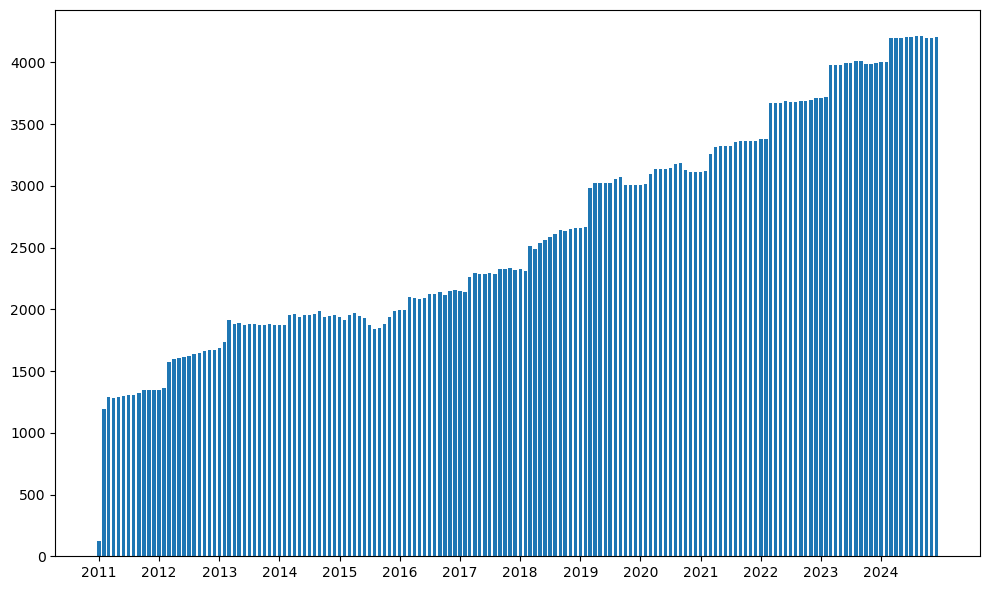

In [21]:
import matplotlib.pyplot as plt

# 确保横轴是 datetime 类型，而不是 Period 或 MonthEnd
x_values = monthly_counts.index.to_timestamp() if hasattr(monthly_counts.index, "to_timestamp") else monthly_counts.index

plt.figure(figsize=(10, 6))
plt.bar(x_values, monthly_counts.values, width=20)  # width 可改为更合适的值，如 20 天

# 设置年份刻度（每12个月一个刻度）
tick_positions = x_values[::12]
tick_labels = [d.strftime('%Y') for d in tick_positions]

plt.xticks(tick_positions, tick_labels, rotation=0)
plt.tight_layout()
plt.savefig(r"C:\Users\32197\Desktop\每月数据量统计.png",dpi = 400)
plt.show()

In [22]:
df_sample.to_csv(r"C:\Users\32197\Desktop\滚动窗口样本2010-2020.csv")
df_predict.to_csv(r"C:\Users\32197\Desktop\滚动窗口预测2021-2024.csv")